In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, confusion_matrix, precision_score
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import hinge_loss
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

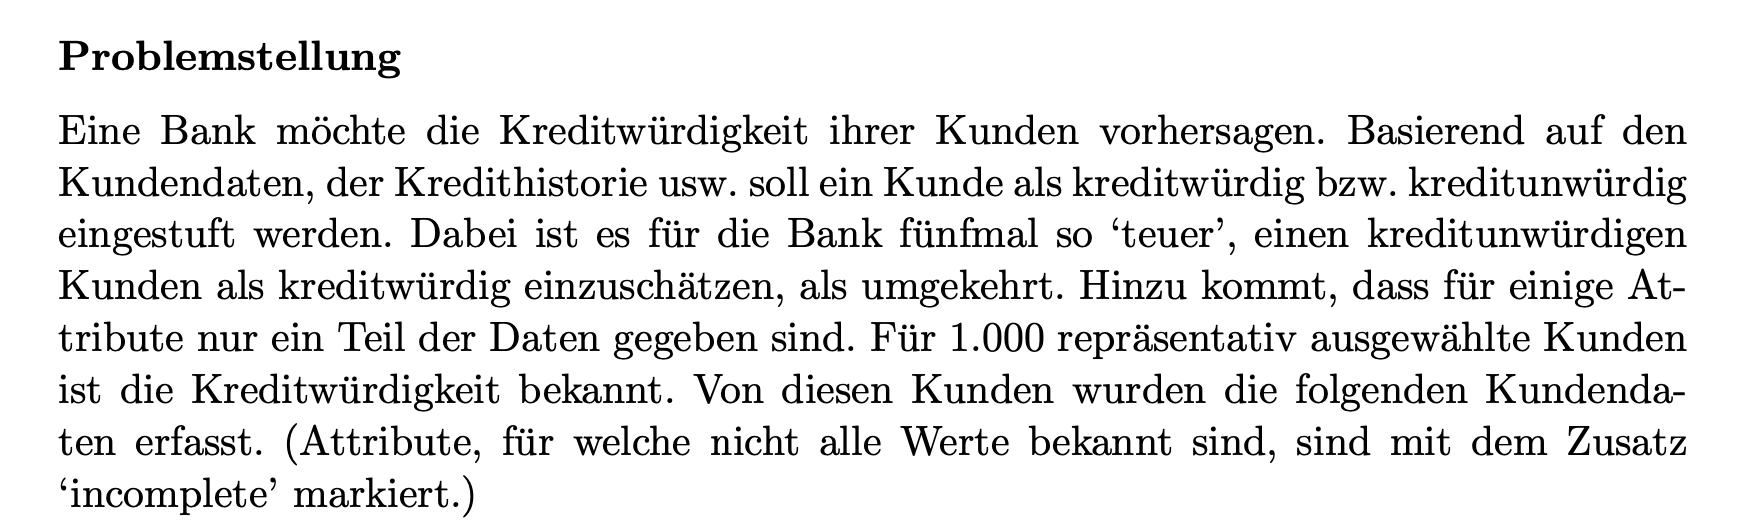

- wichtig: dabei ist es für die Bank fünfmal so "teuer" einen kreditunwürdigen Kunden als kreditwürdig einzuschätzen als umgekehrt

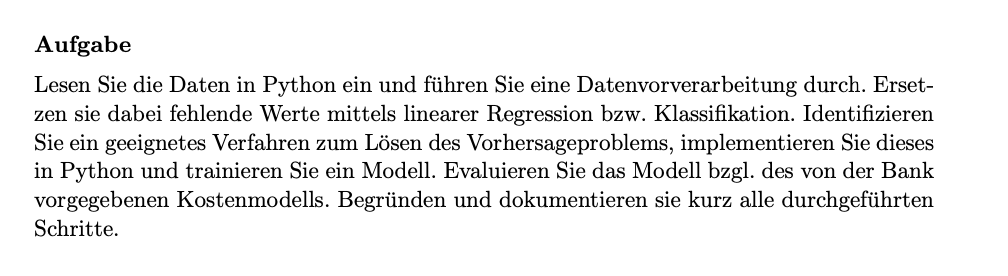

1. Ersetzen fehlender Werte 
    - entweder durch Regression oder Klassifikation
2. Verfahren zum Lösen des Vorhersageproblem
3. Trainiere Modell 
    - Klassifikation durch Decission Tree oder Random Forrest
4. Evaluation

In [2]:
file_path = 'kredit.dat'

# Read the file line by line, cleaning up extra characters and fixing delimiters
data_lines = []
with open(file_path, 'r') as f:
    for line in f:
        # Remove any leading or trailing whitespace and split using tabs
        cleaned_line = line.strip().replace('\t', ' ').replace('/', '').split()
        data_lines.append(cleaned_line)

# Create a DataFrame from the cleaned data
df = pd.DataFrame(data_lines)

In [3]:
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [4]:
columns = ['Status of existing checking account','Duration in month','Credit history','Purpose (incomplete)', 'Credit amount',
          'Savings account/bonds', 'Present employment since (incomplete)', 'Installment rate in percentage of disposable income',
          'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years',
          'Other installment plans', 'Housing','Number of existing credits at this bank', 'Job (incomplete)', 
          'Number of people being liable to provide maintenance for', 'Telephone', 'Foreign worker (incomplete)', 'Creditworthy']
df.columns=columns

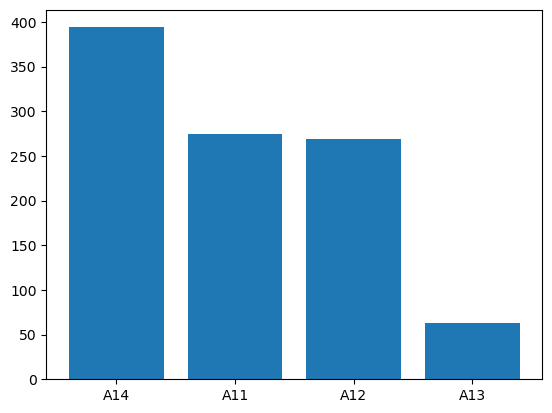

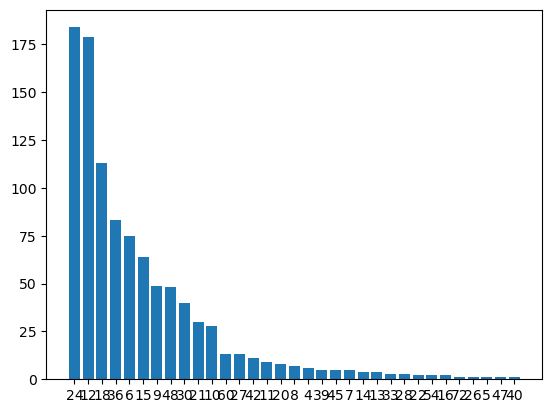

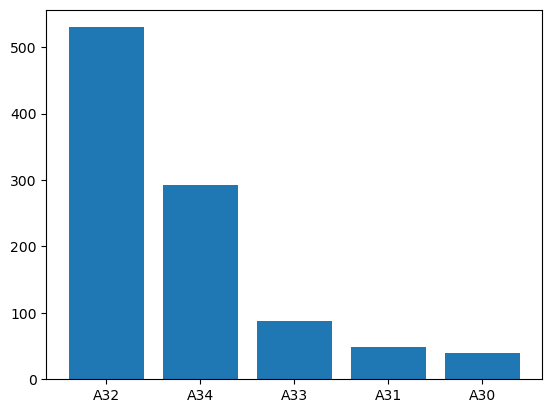

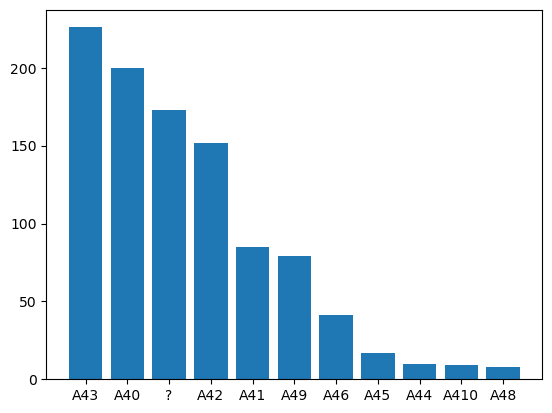

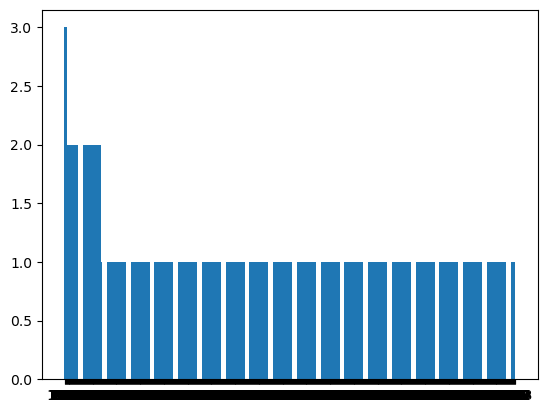

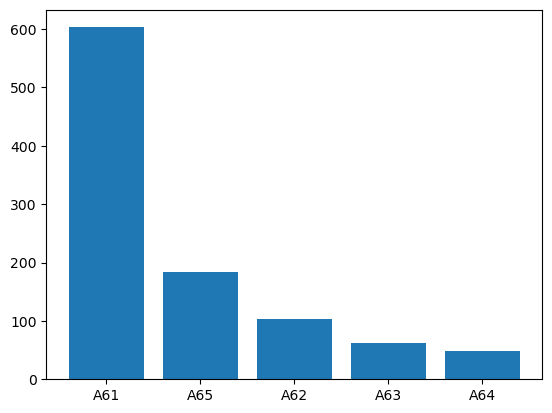

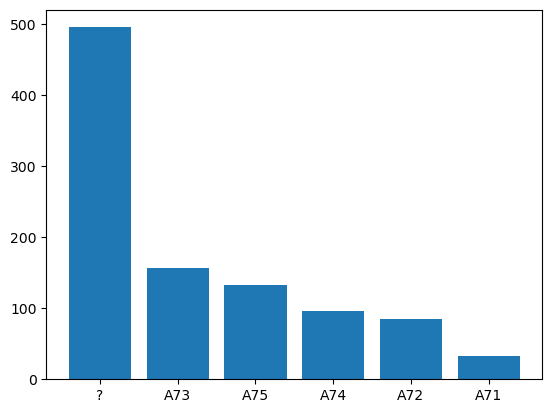

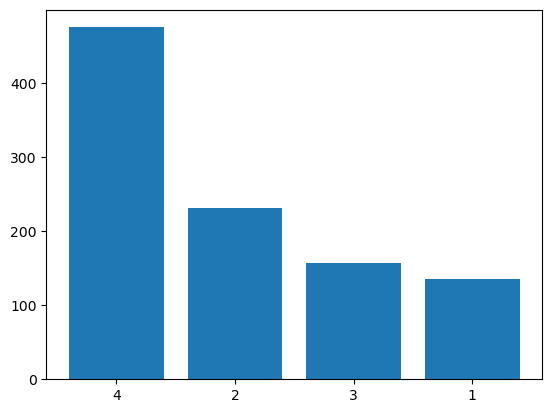

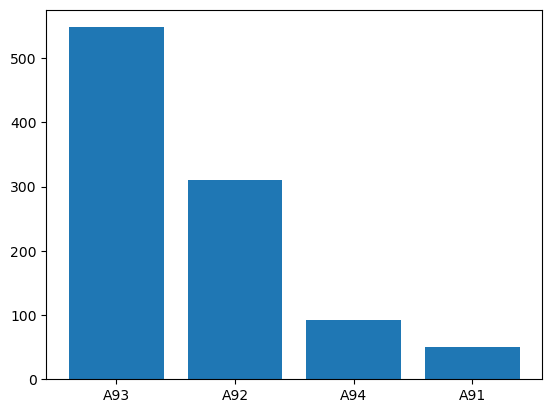

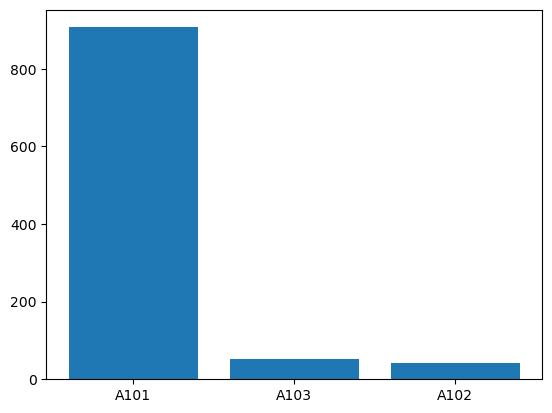

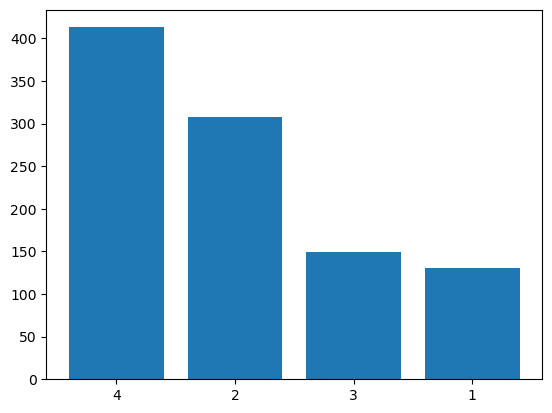

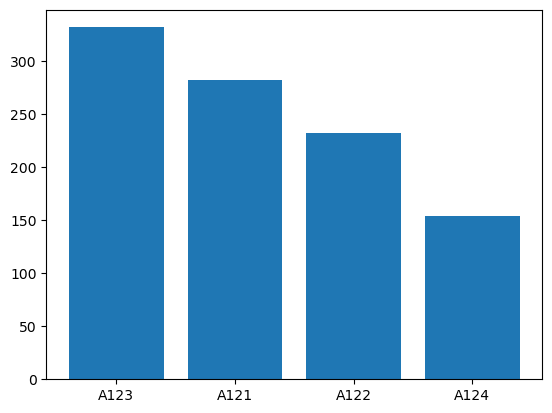

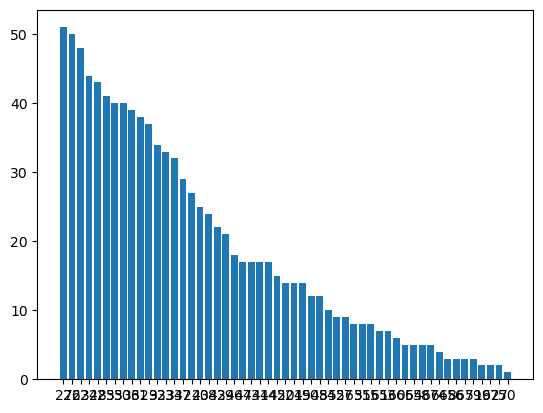

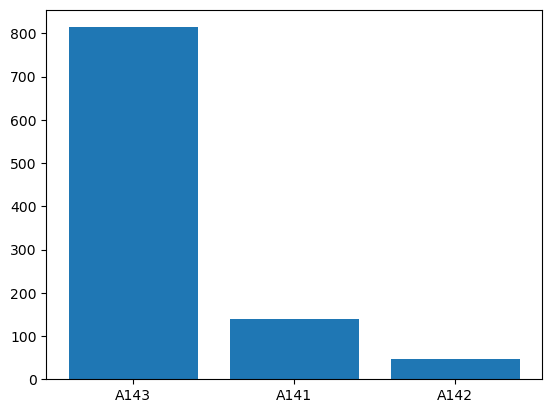

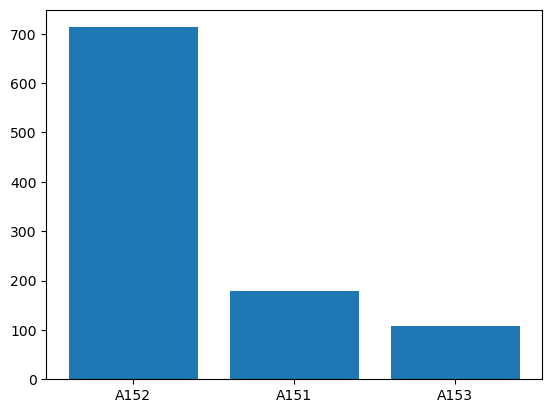

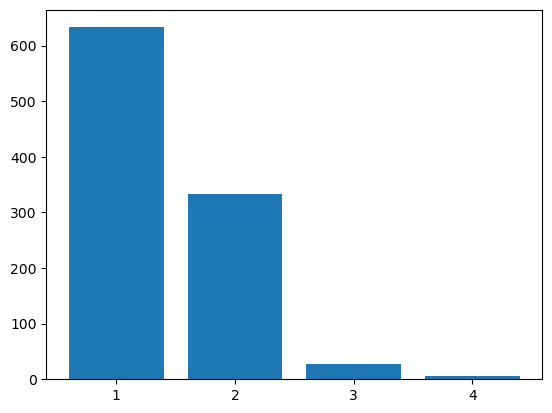

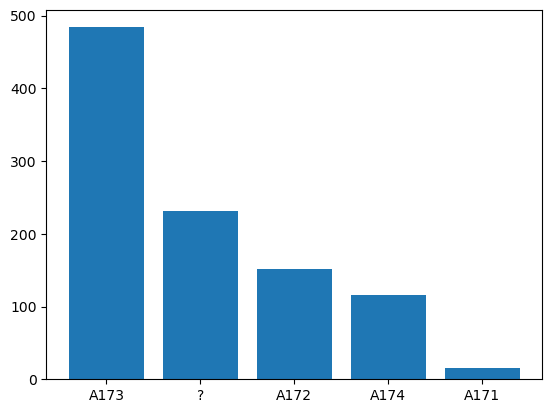

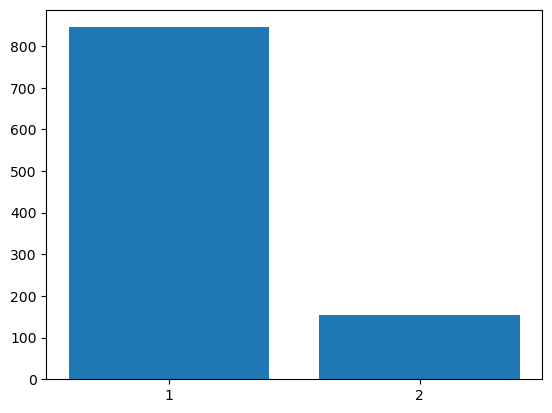

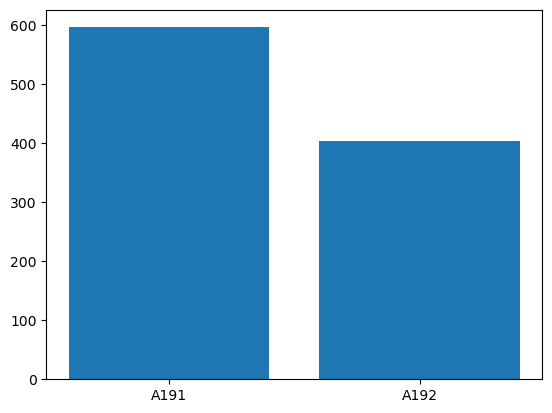

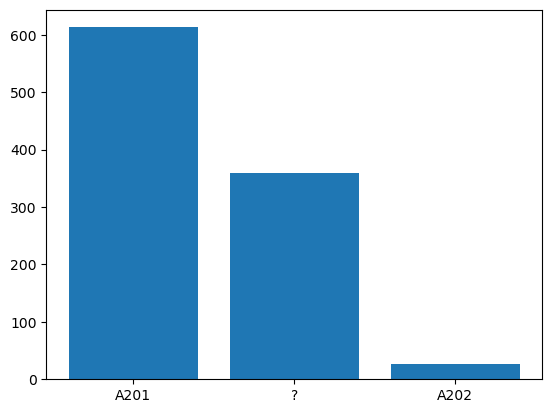

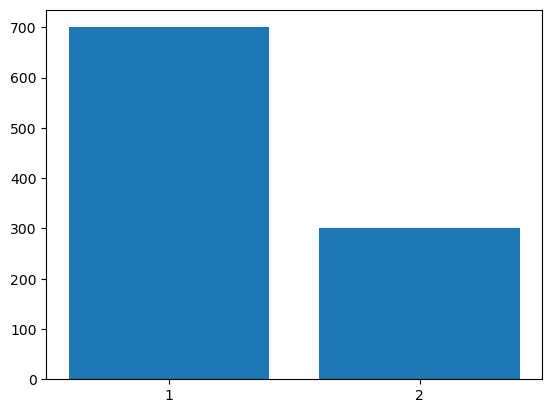

In [5]:

for column in df.columns:
    x_values = df[column].value_counts().index
    y_values = df[column].value_counts()
    plt.bar(x_values,height=y_values)
    plt.show()


In [6]:
df.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,33,5,11,921,5,6,4,4,3,...,4,53,3,3,4,5,2,2,3,2
top,A14,24,A32,A43,1275,A61,?,4,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1
freq,394,184,530,226,3,603,496,476,548,907,...,332,51,814,713,633,484,845,596,613,700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   object
 2   Credit history                                            1000 non-null   object
 3   Purpose (incomplete)                                      1000 non-null   object
 4   Credit amount                                             1000 non-null   object
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since (incomplete)                     1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   object
 8   Personal status and sex      

In [8]:
df.head() 

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [9]:
def analyze_column(df, column_name):
    # Get value counts for column
    value_counts = df[column_name].value_counts()
    # Calculate the percentage
    percentage = (value_counts / len(df)) * 100
    # df display count and percentage
    result_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})

    return result_df

In [10]:
result_purpose = analyze_column(df, 'Purpose (incomplete)')
print('Column Analysis: Purpose (incomplete)')
result_purpose

Column Analysis: Purpose (incomplete)


,Count,Percentage
A43,226,22.6
A40,200,20.0
?,173,17.3
A42,152,15.2
A41,85,8.5
A49,79,7.9
A46,41,4.1
A45,17,1.7
A44,10,1.0
A410,9,0.9


In [11]:
result_employ = analyze_column(df, 'Present employment since (incomplete)')
print('Column Analysis: Present employment since (incomplete)')
result_employ

Column Analysis: Present employment since (incomplete)


,Count,Percentage
?,496,49.6
A73,157,15.7
A75,133,13.3
A74,96,9.6
A72,85,8.5
A71,33,3.3


In [12]:
result_job = analyze_column(df, 'Job (incomplete)')
print('Column Analysis: Job (incomplete)')
result_job

Column Analysis: Job (incomplete)


,Count,Percentage
A173,484,48.4
?,232,23.2
A172,152,15.2
A174,116,11.6
A171,16,1.6


In [13]:
result_worker = analyze_column(df, 'Foreign worker (incomplete)')
print('Column Analysis: Foreign worker (incomplete)')
result_worker

Column Analysis: Foreign worker (incomplete)


,Count,Percentage
A201,613,61.3
?,360,36.0
A202,27,2.7


In [14]:
result_worker = analyze_column(df, 'Creditworthy')
print('Column Analysis: Creditworthy')
result_worker

Column Analysis: Creditworthy


,Count,Percentage
1,700,70.0
2,300,30.0


In [15]:
df = df.replace("?", pd.NA)
df.isnull().sum()

Status of existing checking account                           0
Duration in month                                             0
Credit history                                                0
Purpose (incomplete)                                        173
Credit amount                                                 0
Savings account/bonds                                         0
Present employment since (incomplete)                       496
Installment rate in percentage of disposable income           0
Personal status and sex                                       0
Other debtors / guarantors                                    0
Present residence since                                       0
Property                                                      0
Age in years                                                  0
Other installment plans                                       0
Housing                                                       0
Number of existing credits at this bank 

In [16]:
# Count missing values in each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_count / len(df)) * 100

missing_data_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})

# filter rows where missing count is greater than zero
missing_data_summary = missing_data_summary[missing_data_summary['Missing Count'] > 0]

# sort the summary by missing percentage (descending order)
missing_data_summary = missing_data_summary.sort_values(by='Missing Percentage', ascending=False)

# Display the summary
missing_data_summary

,Missing Count,Missing Percentage
Present employment since (incomplete),496,49.6
Foreign worker (incomplete),360,36.0
Job (incomplete),232,23.2
Purpose (incomplete),173,17.3


In [17]:
missing_count

Status of existing checking account                           0
Duration in month                                             0
Credit history                                                0
Purpose (incomplete)                                        173
Credit amount                                                 0
Savings account/bonds                                         0
Present employment since (incomplete)                       496
Installment rate in percentage of disposable income           0
Personal status and sex                                       0
Other debtors / guarantors                                    0
Present residence since                                       0
Property                                                      0
Age in years                                                  0
Other installment plans                                       0
Housing                                                       0
Number of existing credits at this bank 

In [18]:
# Create a DataFrame to store missing values counts by Feature and Creditworthy class
missing_values_df = pd.DataFrame(columns=['Feature', 'Class'])

# Loop through features with missing values
for feature in df.columns[df.isnull().any()]:
    # Get the indices of missing values for each feature
    missing_indices = df[df[feature].isnull()].index
    
    # Get the corresponding class labels for the missing values
    missing_classes = df.loc[missing_indices, 'Creditworthy'].tolist()
    
    # Add a row to the DataFrame for each missing value
    for class_label in missing_classes:
        missing_values_df = missing_values_df.append({
            'Feature': feature,
            'Class': class_label
        }, ignore_index=True)

# Count how often each feature appears in each class
feature_class_counts = missing_values_df.groupby(['Feature', 'Class']).size().unstack(fill_value=0)

# Display the DataFrame
feature_class_counts


Class,1,2
Feature,,
Foreign worker (incomplete),255,105
Job (incomplete),176,56
Present employment since (incomplete),364,132
Purpose (incomplete),131,42


### Transform numeric values from object to numeric

In [19]:
# Convert selected columns to numeric data types
numeric_columns = [
    'Duration in month', 'Credit amount',
    'Installment rate in percentage of disposable income',
    'Present residence since', 'Age in years',
    'Number of existing credits at this bank',
    'Number of people being liable to provide maintenance for'
]
categoric_columns = [ 
    "Status of existing checking account", "Credit history", "Purpose (incomplete)",                                       
    "Savings account/bonds", "Present employment since (incomplete)", "Personal status and sex",                                       
    "Other debtors / guarantors", "Property" ,"Other installment plans", "Housing"                                                       
    ,"Job (incomplete)", "Foreign worker (incomplete)"
]


df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")
#df[categoric_columns]

In [20]:
# Perform one-hot encoding on categorical features
df_one_hot = pd.get_dummies(df[categoric_columns])

In [21]:
df_complete = pd.concat([df_one_hot, df[numeric_columns], df['Creditworthy']], axis=1)
df_complete.head()

,Status of existing checking account_A11,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A30,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose (incomplete)_A40,...,Foreign worker (incomplete)_A201,Foreign worker (incomplete)_A202,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Creditworthy
0,0,0,0,1,0,0,1,0,0,0,...,0,0,36,2299,4,4,39,1,1,1
1,0,1,0,0,0,0,1,0,0,0,...,1,0,18,1239,4,4,61,1,1,1
2,0,0,1,0,0,0,1,0,0,1,...,0,0,24,947,4,3,38,1,2,2
3,0,0,0,1,0,0,0,1,0,0,...,1,0,15,1478,4,3,33,2,1,1
4,0,0,0,1,0,0,1,0,0,1,...,1,0,24,1525,4,3,34,1,2,1


In [22]:
# Convert 'Creditworthy' column to numeric
df_complete['Creditworthy'] = df_complete['Creditworthy'].astype(int)
# Replace values
df_complete['Creditworthy'].replace([1, 2], [1, 0], inplace=True) #1 = creditworthy, 0 = not creditworthy

In [23]:
df_complete.head()

,Status of existing checking account_A11,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A30,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose (incomplete)_A40,...,Foreign worker (incomplete)_A201,Foreign worker (incomplete)_A202,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Creditworthy
0,0,0,0,1,0,0,1,0,0,0,...,0,0,36,2299,4,4,39,1,1,1
1,0,1,0,0,0,0,1,0,0,0,...,1,0,18,1239,4,4,61,1,1,1
2,0,0,1,0,0,0,1,0,0,1,...,0,0,24,947,4,3,38,1,2,0
3,0,0,0,1,0,0,0,1,0,0,...,1,0,15,1478,4,3,33,2,1,1
4,0,0,0,1,0,0,1,0,0,1,...,1,0,24,1525,4,3,34,1,2,1


## 1. Ersetzen der fehlenden Werte/ Missing value

In [24]:
# List of columns with missing values
miss_col = ["Purpose (incomplete)", 
            "Present employment since (incomplete)", 
            "Job (incomplete)", "Foreign worker (incomplete)"]

# Function to separate missing and complete datasets for a given column
def get_missing_value(col_name):
    df_missing = pd.DataFrame(columns=df.columns)
    df_complete = pd.DataFrame(columns=df.columns)
    i_miss = 0
    i_complete = 0
    for index, row in df.iterrows():
        if pd.isna(row[col_name]):
            df_missing.loc[i_miss] = row[df.columns]
            i_miss += 1
        else:
            df_complete.loc[i_complete] = row[df.columns]
            i_complete += 1
    return df_missing, df_complete


In [25]:
def get_prediction(train_df, col_name, model):
    le = preprocessing.LabelEncoder()

    # Fit and transform the label encoder on the entire dataset
    for column_name in train_df.columns:
        if column_name not in [col_name]:
            le.fit(df[column_name])
            train_df[column_name] = le.transform(train_df[column_name])

    train_x_df = train_df.drop(axis=1, columns=[col_name])

    train_x_features_encoded = train_x_df.values

    train_y_df = list(train_df[col_name])
    train_y_features_encoded = le.fit_transform(train_y_df)

    X_train, X_test, y_train, y_test = train_test_split(train_x_features_encoded, train_y_features_encoded, test_size=0.3, random_state=0)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')  # Change this line to use 'macro' average
    
    # Calculate AUC for each class separately and then take the mean
    y_pred_probs = model.predict_proba(X_test)  # Get class probabilities
    auc_scores = []
    for class_idx in range(len(np.unique(y_test))):
        y_true_class = (y_test == class_idx).astype(int)  # Convert to binary for the current class
        auc_class = roc_auc_score(y_true_class, y_pred_probs[:, class_idx])
        auc_scores.append(auc_class)
    auc_macro = np.mean(auc_scores)  # Calculate the macro-average AUC

    return accuracy, f1_macro, auc_macro

### Evaluate which model is the best for which column

In [26]:
df_missing_1, df_complete_1 = get_missing_value(miss_col[0])
train_1_df = df_complete_1.drop(axis=1, columns=[ 
            "Present employment since (incomplete)", 
            "Job (incomplete)", "Foreign worker (incomplete)"])


train_1_df = df_complete_1.drop(axis=1, columns=["Present employment since (incomplete)", "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[0], DecisionTreeClassifier(random_state=0))
print('Decisision Tree Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=["Present employment since (incomplete)", "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[0], RandomForestClassifier(random_state=0))
print('Random Forrest Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC: {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=["Present employment since (incomplete)", "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB ,f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[0], LogisticRegression(random_state=0))
print('Logistic Regression Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score: {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

Decisision Tree Model:   Accuracy: 0.24 F1 Score : 0.13 AUC : 0.52
Random Forrest Model:   Accuracy: 0.33 F1 Score : 0.15 AUC: 0.66
Logistic Regression Model:   Accuracy: 0.30 F1 Score: 0.11 AUC : 0.57


In [27]:
df_missing_1, df_complete_1 = get_missing_value(miss_col[1])
train_1_df = df_complete_1.drop(axis=1, columns=[ 
            'Purpose (incomplete)', 
            "Job (incomplete)", "Foreign worker (incomplete)"])


train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB,  f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[1], DecisionTreeClassifier(random_state=0))
print('Decisision Tree Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[1], RandomForestClassifier(random_state=0))
print('Random Forrest Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', "Job (incomplete)", "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[1], LogisticRegression(random_state=0))
print('Logistic Regression Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

Decisision Tree Model:   Accuracy: 0.26 F1 Score : 0.24 AUC : 0.52
Random Forrest Model:   Accuracy: 0.33 F1 Score : 0.29 AUC : 0.65
Logistic Regression Model:   Accuracy: 0.40 F1 Score : 0.26 AUC : 0.62


In [28]:
df_missing_1, df_complete_1 = get_missing_value(miss_col[2])
train_1_df = df_complete_1.drop(axis=1, columns=[ 
            'Purpose (incomplete)', 
            'Present employment since (incomplete)', "Foreign worker (incomplete)"])

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)', "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[2], DecisionTreeClassifier(random_state=0))
print('Decisision Tree Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)', "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[2], RandomForestClassifier(random_state=0))
print('Random Forrest Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)', "Foreign worker (incomplete)"])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[2], LogisticRegression(random_state=0))
print('Logistic Regression Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score: {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

Decisision Tree Model:   Accuracy: 0.57 F1 Score : 0.35 AUC : 0.57
Random Forrest Model:   Accuracy: 0.64 F1 Score : 0.36 AUC : 0.74
Logistic Regression Model:   Accuracy: 0.61 F1 Score: 0.28 AUC : 0.63


In [29]:
df_missing_1, df_complete_1 = get_missing_value(miss_col[3])
train_1_df = df_complete_1.drop(axis=1, columns=[ 
            'Purpose (incomplete)', 
            'Present employment since (incomplete)','Job (incomplete)'])

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)', 'Job (incomplete)'])
accuracy_NB, f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[3], DecisionTreeClassifier(random_state=0))
print('Decisision Tree Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score: {f1_score_NB:.2f}", end=' ')
print(f"AUC: {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)', 'Job (incomplete)'])
accuracy_NB,  f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[3], RandomForestClassifier(random_state=0))
print('Random Forrest Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score : {f1_score_NB:.2f}", end=' ')
print(f"AUC : {auc_score_NB:.2f}")

train_1_df = df_complete_1.drop(axis=1, columns=['Purpose (incomplete)', 'Present employment since (incomplete)','Job (incomplete)'])
accuracy_NB,  f1_score_NB, auc_score_NB = get_prediction(train_1_df, miss_col[3], LogisticRegression(random_state=0))
print('Logistic Regression Model:  ', end=' ')
print(f"Accuracy: {accuracy_NB:.2f}", end=' ')
print(f"F1 Score: {f1_score_NB:.2f}", end=' ')
print(f"AUC: {auc_score_NB:.2f}")

Decisision Tree Model:   Accuracy: 0.94 F1 Score: 0.49 AUC: 0.49
Random Forrest Model:   Accuracy: 0.97 F1 Score : 0.49 AUC : 0.72
Logistic Regression Model:   Accuracy: 0.95 F1 Score: 0.49 AUC: 0.77


In [30]:
# Identify columns with missing values
columns_with_missing = ['Purpose (incomplete)', 'Present employment since (incomplete)',
                      'Job (incomplete)','Foreign worker (incomplete)' ]

# Create a DataFrame without missing values
df_complete = df.dropna(subset=columns_with_missing)

# Split data into complete and incomplete sets
X_complete = df_complete.drop(columns=columns_with_missing)
y_complete = df_complete[columns_with_missing]
X_incomplete = df[df.isna().any(axis=1)].drop(columns=columns_with_missing)

# Perform one-hot encoding on categorical features
X_complete_encoded = pd.get_dummies(X_complete)
X_incomplete_encoded = pd.get_dummies(X_incomplete)

# Split the complete data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_complete_encoded, y_complete, test_size=0.2, random_state=42)



### Take Decission Tree for imputing missing values

In [31]:
# Initialize and train a Decision Tree classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict missing values using the trained model
imputed_values = classifier.predict(X_incomplete_encoded)

# Update the original DataFrame with the imputed values
df.loc[df.isna().any(axis=1), columns_with_missing] = imputed_values

In [33]:
# Check if missing values are imputed
print(df.isnull().sum())

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose (incomplete)                                        0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since (incomplete)                       0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job (inc

***
## Verfahren zum Lösen des Vorhersageproblems
### Model Engineering
### Try out per default values several models for the classification of strokes

In [34]:
categoric_columns = [ 
    "Status of existing checking account", "Credit history", "Purpose (incomplete)",                                       
    "Savings account/bonds", "Present employment since (incomplete)", "Personal status and sex",                                       
    "Other debtors / guarantors", "Property" ,"Other installment plans", "Housing"                                                       
    ,"Job (incomplete)","Telephone", "Foreign worker (incomplete)"
]

df_encoded = pd.get_dummies(df, columns=categoric_columns)

### Perform one-hot encoding

In [35]:
# Convert 'Creditworthy' column to numeric
df_encoded['Creditworthy'] = df_encoded['Creditworthy'].astype(int)
# Replace values
df_encoded['Creditworthy'].replace([1, 2], [1, 0], inplace=True)



# Move 'Creditworthy' column to the end
creditworthy_column = df_encoded.pop('Creditworthy')
df_encoded['Creditworthy'] = creditworthy_column

# Display the first few rows of the DataFrame with 'Creditworthy' at the end
df_encoded.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_A11,Status of existing checking account_A12,Status of existing checking account_A13,...,Housing_A153,Job (incomplete)_A171,Job (incomplete)_A172,Job (incomplete)_A173,Job (incomplete)_A174,Telephone_A191,Telephone_A192,Foreign worker (incomplete)_A201,Foreign worker (incomplete)_A202,Creditworthy
0,36,2299,4,4,39,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,18,1239,4,4,61,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
2,24,947,4,3,38,1,2,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,15,1478,4,3,33,2,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4,24,1525,4,3,34,1,2,0,0,0,...,0,0,0,1,0,0,1,1,0,1


In [36]:
# Define the models to evaluate
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    Perceptron(),
    SVC()
]


In [37]:
X = df_encoded.iloc[:, :-1]
y = df_encoded['Creditworthy']

# Split the data into train and test sets, considering the class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
# Define a dictionary to store the evaluation metrics for each model
evaluation_metrics = {}

# Fit and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    evaluation_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'F1-Score': f1}
    
    
# Print the evaluation metrics for each model
for model_name, metrics in evaluation_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

# Select the best model based on a chosen evaluation metric
best_model = max(evaluation_metrics, key=lambda x: evaluation_metrics[x]['F1-Score'])
print(f"The best model is: {best_model}")

Model: DecisionTreeClassifier
Accuracy: 0.645
Precision: 0.7379310344827587
F1-Score: 0.7508771929824561

Model: RandomForestClassifier
Accuracy: 0.745
Precision: 0.7947019867549668
F1-Score: 0.8247422680412371

Model: Perceptron
Accuracy: 0.7
Precision: 0.7
F1-Score: 0.8235294117647058

Model: SVC
Accuracy: 0.715
Precision: 0.7172774869109948
F1-Score: 0.8277945619335346

The best model is: SVC


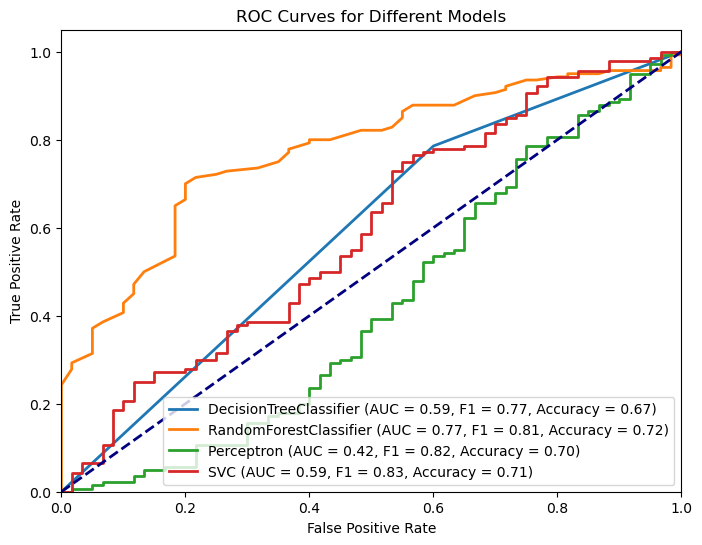

Model: DecisionTreeClassifier
AUC: 0.59
F1 Score: 0.77
Accuracy: 0.67

Model: RandomForestClassifier
AUC: 0.77
F1 Score: 0.81
Accuracy: 0.72

Model: Perceptron
AUC: 0.42
F1 Score: 0.82
Accuracy: 0.70

Model: SVC
AUC: 0.59
F1 Score: 0.83
Accuracy: 0.71



In [39]:
# Initialize an empty figure
plt.figure(figsize=(8, 6))

# Initialize a dictionary to store AUC, F1, and accuracy scores for each model
model_scores = {}

# Fit and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    
    # Check if the model supports probability estimation
    if hasattr(model, 'predict_proba'):
        model.probability = True  # Set probability to True if available
    else:
        model.probability = False
    
    model.fit(X_train, y_train)
    
    # Check if the model supports predict_proba before using it
    if model.probability:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # If predict_proba is not available, use decision function or other appropriate method
        y_pred_proba = model.decision_function(X_test)  # For SVC and other classifiers
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate F1 score
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Plot ROC curve for each model and label it with model name, AUC, F1, and accuracy
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f}, F1 = {f1:.2f}, Accuracy = {accuracy:.2f})')

    # Store AUC, F1, and accuracy score in the dictionary
    model_scores[model_name] = {'AUC': roc_auc, 'F1': f1, 'Accuracy': accuracy}

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

# Print AUC, F1, and accuracy scores for each model
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"AUC: {scores['AUC']:.2f}")
    print(f"F1 Score: {scores['F1']:.2f}")
    print(f"Accuracy: {scores['Accuracy']:.2f}")
    print()


In [40]:
df_encoded['Creditworthy'].value_counts()

1    700
0    300
Name: Creditworthy, dtype: int64

## 1. Model: RandomForest

## Hyperparameter Tuning with  K Fold Validation with 5 Folds¶

## Hyperparameter Tuning

In [41]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'class_weight': [None, {0: 5, 1: 1}],  # Updated class weights -> because bank has to pay more 
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced'],
    'random_state': [42],
}

# Define the scoring metrics (F1 score, AUC score, and accuracy)
scoring = {
    'F1 Score': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score)
}


In [42]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_grid,
                  scoring = scoring, #sklearn.metrics.SCORERS.keys()
                  refit = "F1 Score",
                  cv = 5,
                  verbose = 4)
GS.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.717) Accuracy: (test=0.812) F1 Score: (test=0.877) Precision: (test=0.811) total time=   0.1s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.653) Accuracy: (test=0.756) F1 Score: (test=0.840) Precision: (test=0.779) total time=   0.1s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.759) Accuracy: (test=0.838) F1 Score: (test=0.892) Precision: (test=0.836) total time=   0.1s
[CV 4/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.683) Accuracy: (test=0.781) F1 Score: (test=0.856) Precision: (test=0.794) total time=   0.1s
[CV 5/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100, random_

[CV 5/5] END class_weight=None, max_depth=None, min_samples_split=10, n_estimators=200, random_state=42; AUC: (test=0.749) Accuracy: (test=0.831) F1 Score: (test=0.888) Precision: (test=0.829) total time=   0.2s
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.665) Accuracy: (test=0.781) F1 Score: (test=0.859) Precision: (test=0.781) total time=   0.3s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.655) Accuracy: (test=0.775) F1 Score: (test=0.856) Precision: (test=0.775) total time=   0.3s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.683) Accuracy: (test=0.806) F1 Score: (test=0.877) Precision: (test=0.787) total time=   0.3s
[CV 4/5] END class_weight=None, max_depth=None, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.673) Accuracy: (test=0.775) F1 Sco

[CV 5/5] END class_weight=None, max_depth=5, min_samples_split=10, n_estimators=100, random_state=42; AUC: (test=0.626) Accuracy: (test=0.769) F1 Score: (test=0.856) Precision: (test=0.759) total time=   0.1s
[CV 1/5] END class_weight=None, max_depth=5, min_samples_split=10, n_estimators=200, random_state=42; AUC: (test=0.549) Accuracy: (test=0.719) F1 Score: (test=0.829) Precision: (test=0.722) total time=   0.2s
[CV 2/5] END class_weight=None, max_depth=5, min_samples_split=10, n_estimators=200, random_state=42; AUC: (test=0.545) Accuracy: (test=0.713) F1 Score: (test=0.824) Precision: (test=0.720) total time=   0.2s
[CV 3/5] END class_weight=None, max_depth=5, min_samples_split=10, n_estimators=200, random_state=42; AUC: (test=0.600) Accuracy: (test=0.756) F1 Score: (test=0.851) Precision: (test=0.745) total time=   0.2s
[CV 4/5] END class_weight=None, max_depth=5, min_samples_split=10, n_estimators=200, random_state=42; AUC: (test=0.591) Accuracy: (test=0.744) F1 Score: (test=0.842

[CV 5/5] END class_weight=None, max_depth=10, min_samples_split=5, n_estimators=300, random_state=42; AUC: (test=0.707) Accuracy: (test=0.806) F1 Score: (test=0.873) Precision: (test=0.805) total time=   0.3s
[CV 1/5] END class_weight=None, max_depth=10, min_samples_split=10, n_estimators=100, random_state=42; AUC: (test=0.665) Accuracy: (test=0.781) F1 Score: (test=0.859) Precision: (test=0.781) total time=   0.1s
[CV 2/5] END class_weight=None, max_depth=10, min_samples_split=10, n_estimators=100, random_state=42; AUC: (test=0.665) Accuracy: (test=0.781) F1 Score: (test=0.859) Precision: (test=0.781) total time=   0.1s
[CV 3/5] END class_weight=None, max_depth=10, min_samples_split=10, n_estimators=100, random_state=42; AUC: (test=0.668) Accuracy: (test=0.794) F1 Score: (test=0.870) Precision: (test=0.780) total time=   0.1s
[CV 4/5] END class_weight=None, max_depth=10, min_samples_split=10, n_estimators=100, random_state=42; AUC: (test=0.656) Accuracy: (test=0.769) F1 Score: (test=0

[CV 5/5] END class_weight=None, max_depth=20, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.750) Accuracy: (test=0.825) F1 Score: (test=0.882) Precision: (test=0.833) total time=   0.2s
[CV 1/5] END class_weight=None, max_depth=20, min_samples_split=5, n_estimators=300, random_state=42; AUC: (test=0.677) Accuracy: (test=0.781) F1 Score: (test=0.857) Precision: (test=0.789) total time=   0.3s
[CV 2/5] END class_weight=None, max_depth=20, min_samples_split=5, n_estimators=300, random_state=42; AUC: (test=0.646) Accuracy: (test=0.762) F1 Score: (test=0.847) Precision: (test=0.772) total time=   0.3s
[CV 3/5] END class_weight=None, max_depth=20, min_samples_split=5, n_estimators=300, random_state=42; AUC: (test=0.701) Accuracy: (test=0.806) F1 Score: (test=0.874) Precision: (test=0.800) total time=   0.3s
[CV 4/5] END class_weight=None, max_depth=20, min_samples_split=5, n_estimators=300, random_state=42; AUC: (test=0.658) Accuracy: (test=0.762) F1 Score: (test=0.844

[CV 1/5] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.693) Accuracy: (test=0.787) F1 Score: (test=0.860) Precision: (test=0.800) total time=   0.2s
[CV 2/5] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.699) Accuracy: (test=0.787) F1 Score: (test=0.858) Precision: (test=0.805) total time=   0.2s
[CV 3/5] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.746) Accuracy: (test=0.819) F1 Score: (test=0.878) Precision: (test=0.832) total time=   0.2s
[CV 4/5] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.670) Accuracy: (test=0.762) F1 Score: (test=0.842) Precision: (test=0.789) total time=   0.2s
[CV 5/5] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200, random_state=42; AUC: (test=0.756) Accuracy: (tes

[CV 5/5] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=300, random_state=42; AUC: (test=0.762) Accuracy: (test=0.750) F1 Score: (test=0.804) Precision: (test=0.891) total time=   0.2s
[CV 1/5] END class_weight=balanced, max_depth=5, min_samples_split=5, n_estimators=100, random_state=42; AUC: (test=0.726) Accuracy: (test=0.750) F1 Score: (test=0.815) Precision: (test=0.846) total time=   0.1s
[CV 2/5] END class_weight=balanced, max_depth=5, min_samples_split=5, n_estimators=100, random_state=42; AUC: (test=0.714) Accuracy: (test=0.750) F1 Score: (test=0.818) Precision: (test=0.833) total time=   0.1s
[CV 3/5] END class_weight=balanced, max_depth=5, min_samples_split=5, n_estimators=100, random_state=42; AUC: (test=0.750) Accuracy: (test=0.750) F1 Score: (test=0.808) Precision: (test=0.875) total time=   0.1s
[CV 4/5] END class_weight=balanced, max_depth=5, min_samples_split=5, n_estimators=100, random_state=42; AUC: (test=0.696) Accuracy: (test=0.725) F1 Sco

[CV 4/5] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200, random_state=42; AUC: (test=0.680) Accuracy: (test=0.769) F1 Score: (test=0.845) Precision: (test=0.795) total time=   0.2s
[CV 5/5] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200, random_state=42; AUC: (test=0.756) Accuracy: (test=0.800) F1 Score: (test=0.858) Precision: (test=0.851) total time=   0.2s
[CV 1/5] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=300, random_state=42; AUC: (test=0.698) Accuracy: (test=0.794) F1 Score: (test=0.864) Precision: (test=0.802) total time=   0.3s
[CV 2/5] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=300, random_state=42; AUC: (test=0.716) Accuracy: (test=0.794) F1 Score: (test=0.861) Precision: (test=0.816) total time=   0.3s
[CV 3/5] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=300, random_state=42; AUC: (test=0.696) Accuracy: (test=0.775) F

[CV 3/5] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.682) Accuracy: (test=0.787) F1 Score: (test=0.862) Precision: (test=0.791) total time=   0.1s
[CV 4/5] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.662) Accuracy: (test=0.769) F1 Score: (test=0.849) Precision: (test=0.782) total time=   0.1s
[CV 5/5] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=100, random_state=42; AUC: (test=0.729) Accuracy: (test=0.812) F1 Score: (test=0.875) Precision: (test=0.820) total time=   0.1s
[CV 1/5] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=200, random_state=42; AUC: (test=0.661) Accuracy: (test=0.775) F1 Score: (test=0.855) Precision: (test=0.779) total time=   0.2s
[CV 2/5] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=200, random_state=42; AUC: (test=0.661) Accuracy: (test=0.775) F

[CV 2/5] END class_weight=balanced, max_depth=20, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.729) Accuracy: (test=0.787) F1 Score: (test=0.852) Precision: (test=0.831) total time=   0.3s
[CV 3/5] END class_weight=balanced, max_depth=20, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.719) Accuracy: (test=0.781) F1 Score: (test=0.848) Precision: (test=0.824) total time=   0.3s
[CV 4/5] END class_weight=balanced, max_depth=20, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.692) Accuracy: (test=0.769) F1 Score: (test=0.843) Precision: (test=0.805) total time=   0.3s
[CV 5/5] END class_weight=balanced, max_depth=20, min_samples_split=10, n_estimators=300, random_state=42; AUC: (test=0.763) Accuracy: (test=0.794) F1 Score: (test=0.851) Precision: (test=0.862) total time=   0.3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             refit='F1 Score',
             scoring={'AUC': make_scorer(roc_auc_score),
                      'Accuracy': make_scorer(accuracy_score),
                      'F1 Score': make_scorer(f1_score),
                      'Precision': make_scorer(precision_score)},
             verbose=4)

In [43]:
print(GS.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


In [44]:
print(GS.best_params_)

{'class_weight': None, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [45]:
print(GS.best_score_)

0.8700394965487318


## Model Evaluation: Holdout-testing (Train-Test Split) 

In [46]:
# Extract the test scores for F1 Score from all cross-validation folds
f1_scores = np.array([
    GS.cv_results_['split0_test_F1 Score'],
    GS.cv_results_['split1_test_F1 Score'],
    GS.cv_results_['split2_test_F1 Score'],
    GS.cv_results_['split3_test_F1 Score']
])

# Calculate the average F1 Score across all folds
average_f1_score = np.mean(f1_scores)

# Print the average F1 Score
print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.8471659286049983


In [47]:
# Extract the test scores for Accuracy from all cross-validation folds
accuracy_scores = np.array([
    GS.cv_results_['split0_test_Accuracy'],
    GS.cv_results_['split1_test_Accuracy'],
    GS.cv_results_['split2_test_Accuracy'],
    GS.cv_results_['split3_test_Accuracy']
])

# Calculate the average Accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

# Print the average Accuracy
print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.7702473958333333


In [48]:
# Train the final model on the entire training dataset

hyperparameter_favor_bank = {
    'class_weight':  {0: 5, 1: 1},
    'max_depth': 10,
    'min_samples_split': 2,
    'n_estimators': 200,
    'random_state': 42
}

#final_model = GS.best_estimator_
final_model_favor_bank = RandomForestClassifier(**hyperparameter_favor_bank)

final_model_favor_bank.fit(X_train, y_train)

y_pred = final_model_favor_bank.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.7
Precision: 0.8125
F1 Score: 0.7761194029850748


In [49]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report of Creditworthy Random Forest (bank favor hyperparameter)')
print(class_report)

Classification Report of Creditworthy Random Forest (bank favor hyperparameter)
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        60
           1       0.81      0.74      0.78       140

    accuracy                           0.70       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.72      0.70      0.71       200



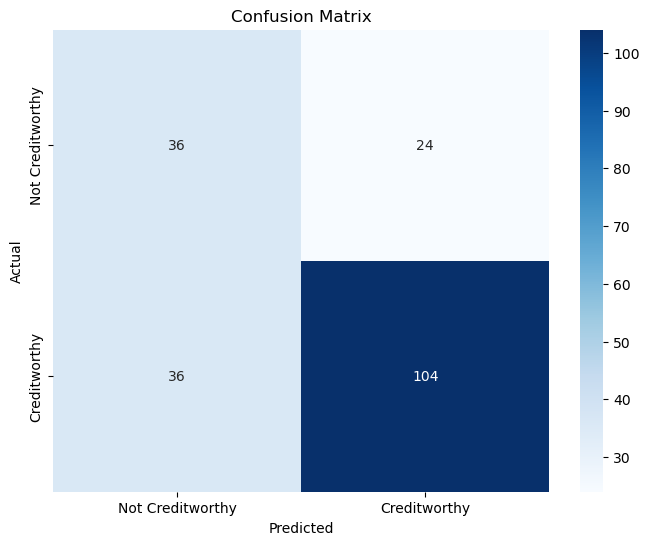

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
hyperparameter_actual = {'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 2, 
                         'n_estimators': 200,
                         'random_state': 42}

final_model_actual_hyperparameter = GS.best_estimator_
#final_model_actual_hyperparameter = RandomForestClassifier(**hyperparameter_actual)

final_model_actual_hyperparameter.fit(X_train, y_train)


y_pred = final_model_actual_hyperparameter.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.735
Precision: 0.7880794701986755
F1 Score: 0.8178694158075602


In [52]:
#Extract values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = false_positive / (false_positive + true_negative)
fnr = false_negative / (false_negative + true_positive)

# Print the FPR and FNR
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

False Positive Rate (FPR): 0.4
False Negative Rate (FNR): 0.2571428571428571


***
### Actual parameter

In [53]:
hyperparameter_actual = {'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 2, 
                         'n_estimators': 200,
                         'random_state': 42}

final_model_actual_hyperparameter = GS.best_estimator_
#final_model_actual_hyperparameter = RandomForestClassifier(**hyperparameter_actual)

final_model_actual_hyperparameter.fit(X_train, y_train)


y_pred = final_model_actual_hyperparameter.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.735
Precision: 0.7880794701986755
F1 Score: 0.8178694158075602


In [54]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report of Creditworthy for RandomForest (actual hyperparameter)')
print(class_report)

Classification Report of Creditworthy for RandomForest (actual hyperparameter)
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.79      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200



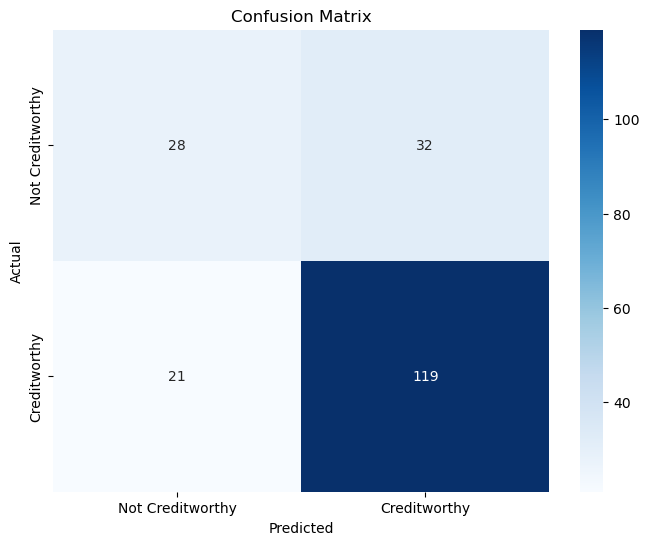

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Extract values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = false_positive / (false_positive + true_negative)
fnr = false_negative / (false_negative + true_positive)

# Print the FPR and FNR
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

False Positive Rate (FPR): 0.5333333333333333
False Negative Rate (FNR): 0.15


## 2. Model: SVM

In [57]:
# Define the parameter grid for hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'class_weight': [{0: 5, 1: 1}, 'balanced'],  # Set class weights for 0 and 1
    'random_state': [42],
}

# Define the scoring metrics for SVM (F1 score, AUC score, and accuracy)
scoring_svm = {
    'F1 Score': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score)
}

In [58]:
GS_svm = GridSearchCV(estimator = SVC(),
                  param_grid = param_grid_svm,
                  scoring = scoring_svm, 
                  refit = "F1 Score",
                  cv = 5,
                  verbose = 4)
GS_svm.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=0.1, class_weight={0: 5, 1: 1}, random_state=42; AUC: (test=0.500) Accuracy: (test=0.300) F1 Score: (test=0.000) Precision: (test=0.000) total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 5, 1: 1}, random_state=42; AUC: (test=0.500) Accuracy: (test=0.300) F1 Score: (test=0.000) Precision: (test=0.000) total time=   0.0s
[CV 3/5] END C=0.1, class_weight={0: 5, 1: 1}, random_state=42; AUC: (test=0.500) Accuracy: (test=0.300) F1 Score: (test=0.000) Precision: (test=0.000) total time=   0.0s
[CV 4/5] END C=0.1, class_weight={0: 5, 1: 1}, random_state=42; AUC: (test=0.500) Accuracy: (test=0.300) F1 Score: (test=0.000) Precision: (test=0.000) total time=   0.0s
[CV 5/5] END C=0.1, class_weight={0: 5, 1: 1}, random_state=42; AUC: (test=0.500) Accuracy: (test=0.300) F1 Score: (test=0.000) Precision: (test=0.000) total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, random_state=42; AUC: (test=0.531) Accurac

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': [{0: 5, 1: 1}, 'balanced'],
                         'random_state': [42]},
             refit='F1 Score',
             scoring={'AUC': make_scorer(roc_auc_score),
                      'Accuracy': make_scorer(accuracy_score),
                      'F1 Score': make_scorer(f1_score),
                      'Precision': make_scorer(precision_score)},
             verbose=4)

In [59]:
print(GS_svm.best_estimator_)

SVC(C=0.1, class_weight='balanced', random_state=42)


In [60]:
print(GS_svm.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'random_state': 42}


In [61]:
print(GS_svm.best_score_)

0.7802572449800944


In [62]:
# Extract the test scores for F1 Score from all cross-validation folds
f1_scores_svm = np.array([
    GS_svm.cv_results_['split0_test_F1 Score'],
    GS_svm.cv_results_['split1_test_F1 Score'],
    GS_svm.cv_results_['split2_test_F1 Score'],
    GS_svm.cv_results_['split3_test_F1 Score']
])

# Calculate the average F1 Score across all folds
average_f1_score_svm = np.mean(f1_scores_svm)

# Print the average F1 Score
print("Average F1 Score:", average_f1_score_svm)

Average F1 Score: 0.38859983711164303


In [63]:
# Extract the test scores for Accuracy from all cross-validation folds
accuracy_scores_svm = np.array([
    GS_svm.cv_results_['split0_test_Accuracy'],
    GS_svm.cv_results_['split1_test_Accuracy'],
    GS_svm.cv_results_['split2_test_Accuracy'],
    GS_svm.cv_results_['split3_test_Accuracy']
])

# Calculate the average Accuracy across all folds
average_accuracy_svm = np.mean(accuracy_scores_svm)

# Print the average Accuracy
print("Average Accuracy:", average_accuracy_svm)

Average Accuracy: 0.4825520833333334


In [64]:
model_svm = GS_svm.best_estimator_
#final_model_actual_hyperparameter = RandomForestClassifier(**hyperparameter_actual)

model_svm.fit(X_train, y_train)


y_pred_svm = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.68
Precision: 0.7435897435897436
F1 Score: 0.7837837837837838


In [65]:
# Generate the classification report
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the classification report
print('Classification Report of Creditworthy for SVM')
print(class_report)

Classification Report of Creditworthy for SVM
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.79      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200



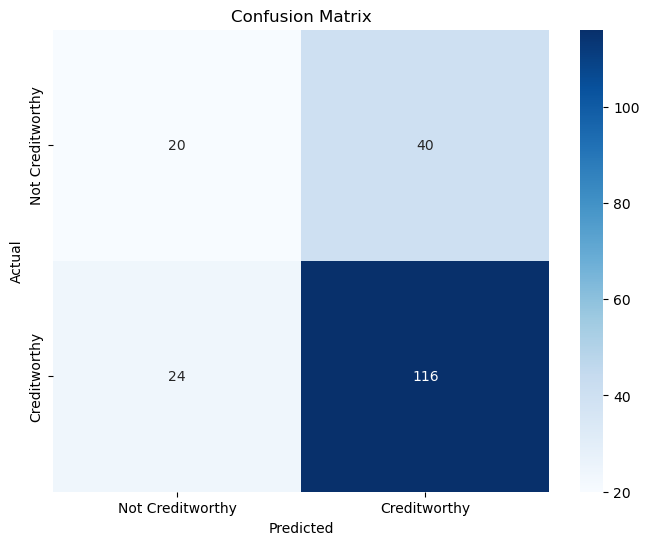

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Extract values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = false_positive / (false_positive + true_negative)
fnr = false_negative / (false_negative + true_positive)

# Print the FPR and FNR
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

False Positive Rate (FPR): 0.6666666666666666
False Negative Rate (FNR): 0.17142857142857143


*** 
### Final Model

- decide to use the hyperparameter for the of favor bank, to minimize the missclassification for the non-creditworthy customers

In [68]:
# Recreate the model with optimal hyperparameters
final_model_complete_set = RandomForestClassifier(**hyperparameter_favor_bank)
# because we want to minimize the false prediction

# Fit the final model on the complete dataset
final_model_complete_set.fit(X, y)

RandomForestClassifier(class_weight={0: 5, 1: 1}, max_depth=10,
                       n_estimators=200, random_state=42)

***

# Resultate: 

English: 
Evaluation of the model with respect to the bank's cost model: 
- To insert/calculate the missing values, model RandomForestClassifier was used, since the combination of F1 and Accuracy was mostly the highest one

So in the model evaluation we choose the model with the highest F1 score
- To decide the model, default values of different models were used and then tested and evaluated using a train/test split
    - decide for trying out SVM and RandomForest
- Hyperparameter tuning was performed using a GridSearch approach with 5-fold cross validation to determine the best parameters.
- special feature: testing of different hyperparameters to minimize misclassification of non-creditworthy customers -> focus on the weights of the classes in the RandomForest
- a model was trained using these parameters and applied to the entire data 
- the model was then trained on the entire data set, which should now give us a model that can be used within the bank 
- both models work somehow equaly well, but i would use randomforest because of the explainability 
- in summary i would choose random forest because of better F1-Score after Hyperparameter tuning

Deutsch: 
Bewertung des Modells im Hinblick auf das Kostenmodell der Bank: 
- Zum einsetzen/ berechnen der Missing values wurde  Modell RandomForestClassifier benutzt, da die Kombination aus F1 und Accuracy meistens die höchste war

Bei der Modellbewertung wählen wir also das Modell mit dem höchsten F1-Score
- Zur Entscheidungsfindung des Modells, wurden hierbei default Werte verschiedener Modelle verwendet und diese dann mithilfe eines Train/ Test Splits getestet und evaluiert wurden 
- Hyperparametertuning wurde anhand eines GridSearch ansatzes durchgeführt mit 5-fold cross validation,um die besten Parameter bestimmen
- Besonderheit: austesten von verschiedenen Hyperparameter zu Minimierung der falsch-klassifikation der nicht-kreditwürdigen Kunden -> Fokussierung auf die Gewichte der Klassen im RandomForest
- ein Modell wurde mithilfe dieser Parameter trainiert und angewendet auf die gesamten Daten 
- das Modell wurde dann  auf den gesamten Datensatz trainiert, wodurch wir jetzt ein Modell haben sollen, welches innerhalb der Bank verwendet werden kann 

